In [ ]:
!pip install ortools

#Using Google OR tools

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,536, 194, 798, 0
        ],
    ]
    data['num_vehicles'] = 4
    data['depot'] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))



def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print('No solution found !')


if __name__ == '__main__':
    main()

In [ ]:
data={}

In [ ]:
data['distance_matrix'] = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,536, 194, 798, 0
        ],
    ]

In [ ]:
data['distance_matrix']

[[0,
  548,
  776,
  696,
  582,
  274,
  502,
  194,
  308,
  194,
  536,
  502,
  388,
  354,
  468,
  776,
  662],
 [548,
  0,
  684,
  308,
  194,
  502,
  730,
  354,
  696,
  742,
  1084,
  594,
  480,
  674,
  1016,
  868,
  1210],
 [776,
  684,
  0,
  992,
  878,
  502,
  274,
  810,
  468,
  742,
  400,
  1278,
  1164,
  1130,
  788,
  1552,
  754],
 [696,
  308,
  992,
  0,
  114,
  650,
  878,
  502,
  844,
  890,
  1232,
  514,
  628,
  822,
  1164,
  560,
  1358],
 [582,
  194,
  878,
  114,
  0,
  536,
  764,
  388,
  730,
  776,
  1118,
  400,
  514,
  708,
  1050,
  674,
  1244],
 [274,
  502,
  502,
  650,
  536,
  0,
  228,
  308,
  194,
  240,
  582,
  776,
  662,
  628,
  514,
  1050,
  708],
 [502,
  730,
  274,
  878,
  764,
  228,
  0,
  536,
  194,
  468,
  354,
  1004,
  890,
  856,
  514,
  1278,
  480],
 [194,
  354,
  810,
  502,
  388,
  308,
  536,
  0,
  342,
  388,
  730,
  468,
  354,
  320,
  662,
  742,
  856],
 [308,
  696,
  468,
  844,
  730,
  194

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
location=[(456, 320), 
(228, 0),
(912, 0), 
(0, 80), 
(114, 80),   
(570, 160),  
(798, 160),  
(342, 240),  
(684, 240),  
(570, 400),  
(912, 400),  
(114, 480),  
(228, 480),  
(342, 560),  
(684, 560),  
(0, 640),    
(798, 640)] 

In [ ]:
location

[(456, 320),
 (228, 0),
 (912, 0),
 (0, 80),
 (114, 80),
 (570, 160),
 (798, 160),
 (342, 240),
 (684, 240),
 (570, 400),
 (912, 400),
 (114, 480),
 (228, 480),
 (342, 560),
 (684, 560),
 (0, 640),
 (798, 640)]

In [ ]:
location1 =  [list( map(int,i) ) for i in location]
location1

[[456, 320],
 [228, 0],
 [912, 0],
 [0, 80],
 [114, 80],
 [570, 160],
 [798, 160],
 [342, 240],
 [684, 240],
 [570, 400],
 [912, 400],
 [114, 480],
 [228, 480],
 [342, 560],
 [684, 560],
 [0, 640],
 [798, 640]]

In [ ]:
df_location = pd.DataFrame(location1, columns=list('xy'))
df_location

,x,y
0,456,320
1,228,0
2,912,0
3,0,80
4,114,80
5,570,160
6,798,160
7,342,240
8,684,240
9,570,400


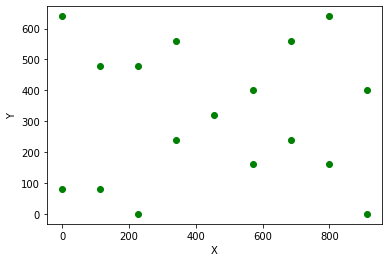

In [ ]:
plt.scatter(df_location['x'],df_location['y'],c='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Using K-means Cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data['distance_matrix'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

7843008.19047619

Text(0, 0.5, 'Inertia')

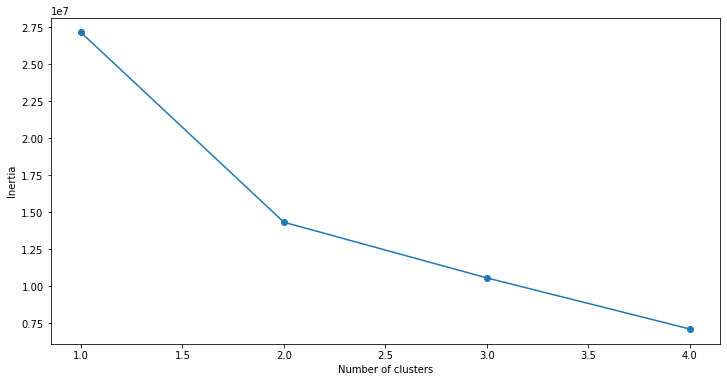

In [ ]:
SSE = []
for cluster in range(1,5):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data['distance_matrix'])
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,5), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(df_location)
pred = kmeans.predict(df_location)

In [ ]:
#frame = pd.DataFrame(df_location)
df_location['Pred_Cluster'] = pred
df_location['Pred_Cluster'].value_counts()

1    5
3    4
2    4
0    4
Name: Pred_Cluster, dtype: int64

In [ ]:
df_location


,x,y,Pred_Cluster
0,456,320,1
1,228,0,2
2,912,0,1
3,0,80,2
4,114,80,2
5,570,160,1
6,798,160,1
7,342,240,2
8,684,240,1
9,570,400,3


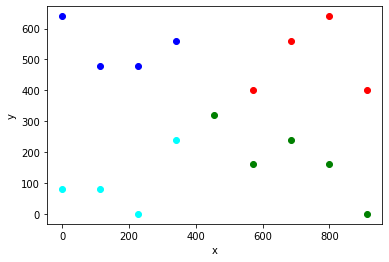

In [ ]:
k=4
color=['blue','green','cyan','red']
for k in range(0,k):
    dataa=df_location[df_location["Pred_Cluster"]==k]
    plt.scatter(dataa["x"],dataa["y"],c=color[k])
#plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()